<a href="https://colab.research.google.com/github/willdphan/cardiovascular-disease/blob/main/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cardiovascular Disease Risk

The dataset focuses on predicting Cardiovascular Disease risks based on personal lifestyle factors, sourced from the Behavioral Risk Factor Surveillance System (BRFSS) - a leading health survey in the U.S.

The dataset is refined from 304 variables down to 19 crucial lifestyle-related factors linked to cardiovascular diseases.

Dataset is from [Kaggle](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset).

> ## Steps to Cardiovascular Disease Risk Prediction


>>[Import Libraries](#scrollTo=avdRpqxlSJWy)

>>[Read Data](#scrollTo=41AKWZKMSJW0)

>>[View Duplicates](#scrollTo=sU0b5XxQSJW1)

>>[Set the Target Variable](#scrollTo=f6ZupLDUSJW1)

>>[Create Numerical and Categorical Columns](#scrollTo=7gjh6WcnSJW1)

>>[Numerical Data](#scrollTo=Rj5SOzZjSJW1)

>>[Multivariate Analysis](#scrollTo=5RW1PTNqSJW1)

>>[Categorical Data](#scrollTo=5RW1PTNqSJW1)

>>[Numerical Data](#scrollTo=MwonX8lgSJW2)

>>[Preprocessing](#scrollTo=VNR55LQoSJW2)

>>[Set Target Variable and Split Data](#scrollTo=1DCZr7fzSJW3)

>>[Create Pipelines](#scrollTo=0qYeAaFASJW9)

>>[Create Fit and Train Function](#scrollTo=Sk03-XcfSJW9)

>>[Define all Pipelines and Models](#scrollTo=dweoPLxESJW9)

>>[Get Predictions from Models](#scrollTo=2p9k8dOmSJW-)



>[Cardiovascular Disease Risk](#scrollTo=cnI0NWewSJWy)

>>[Steps to Cardiovascular Disease Risk Prediction](#scrollTo=cnI0NWewSJWy)

>>>[Import Libraries](#scrollTo=avdRpqxlSJWy)

>>>[Read Data](#scrollTo=41AKWZKMSJW0)

>>>[View Duplicates](#scrollTo=sU0b5XxQSJW1)

>>>[Set the Target Variable](#scrollTo=f6ZupLDUSJW1)

>>>[Create Numerical and Categorical Columns](#scrollTo=7gjh6WcnSJW1)

>>>[Numerical Data](#scrollTo=Rj5SOzZjSJW1)

>>>[Multivariate Analysis](#scrollTo=5RW1PTNqSJW1)

>>>[Categorical Data](#scrollTo=5RW1PTNqSJW1)

>>>[Numerical Data](#scrollTo=MwonX8lgSJW2)

>>>[Preprocessing](#scrollTo=VNR55LQoSJW2)

>>>[Set Target Variable and Split Data](#scrollTo=1DCZr7fzSJW3)

>>>[Create Pipelines](#scrollTo=0qYeAaFASJW9)

>>>[Create Fit and Train Function](#scrollTo=Sk03-XcfSJW9)

>>>[Define all Pipelines and Models](#scrollTo=dweoPLxESJW9)

>[Get Predictions from Models](#scrollTo=2p9k8dOmSJW-)



### Import Libraries
Import the libraries uses for data analysis, modeling.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200) # see all columns
pd.set_option("display.precision", 2)

# Plotting
import matplotlib.pylab as plt
import seaborn as sns
import textwrap
import matplotlib.cm as cm

## For preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.pipeline import Pipeline

## Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import mean_absolute_error

# Warnings
import warnings
warnings.filterwarnings("ignore")

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


### Read Data

In [ ]:
df = pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')
df.shape

(308854, 19)

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [ ]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [ ]:
columns = df.columns
columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
len(columns)

19

In [ ]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.0,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.1,29.84,15.11,6.30
std,10.66,21.34,6.52,8.2,24.88,14.93,8.58
min,91.00,24.95,12.02,0.0,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.0,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.0,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.0,30.00,20.00,8.00
max,241.00,293.02,99.33,30.0,120.00,128.00,128.00


In [ ]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### View Duplicates

In [ ]:
duplicates = df.loc[df.duplicated(keep=False)]
duplicates

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
368,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,83.91,25.09,No,0.0,8.0,4.0,4.0
5339,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,75-79,160.0,81.65,31.89,No,0.0,30.0,16.0,0.0
10086,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,50-54,163.0,72.57,27.46,No,0.0,30.0,30.0,4.0
13312,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,165.0,54.43,19.97,No,0.0,30.0,12.0,4.0
14095,Very Good,Within the past year,Yes,No,Yes,Yes,No,No,Yes,Male,75-79,183.0,99.79,29.84,No,0.0,16.0,12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,70-74,173.0,77.11,25.85,No,0.0,30.0,30.0,0.0
303040,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,55-59,168.0,74.84,26.63,No,0.0,30.0,30.0,4.0
303600,Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,157.0,72.57,29.26,No,0.0,4.0,12.0,4.0
303609,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,160.0,58.97,23.03,No,0.0,30.0,4.0,4.0


In [ ]:
first_dup = duplicates.iloc[0]
first_dup

General_Health                             Very Good
Checkup                         Within the past year
Exercise                                         Yes
Heart_Disease                                     No
Skin_Cancer                                       No
Other_Cancer                                      No
Depression                                        No
Diabetes                                          No
Arthritis                                         No
Sex                                             Male
Age_Category                                   65-69
Height_(cm)                                    183.0
Weight_(kg)                                    83.91
BMI                                            25.09
Smoking_History                                   No
Alcohol_Consumption                              0.0
Fruit_Consumption                                8.0
Green_Vegetables_Consumption                     4.0
FriedPotato_Consumption                       

View the reason behind the duplicate, it there is a specific reason.

In [ ]:
first_dup_set = duplicates[duplicates[columns].apply(lambda row: row.equals(first_dup[columns]), axis=1)]
first_dup_set

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
368,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,83.91,25.09,No,0.0,8.0,4.0,4.0
263102,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,83.91,25.09,No,0.0,8.0,4.0,4.0


In [ ]:
new_df = df.copy()
new_df = new_df.drop_duplicates()
duplicates = new_df.loc[new_df.duplicated(keep=False)]
duplicates.sum()

General_Health                  0.0
Checkup                         0.0
Exercise                        0.0
Heart_Disease                   0.0
Skin_Cancer                     0.0
Other_Cancer                    0.0
Depression                      0.0
Diabetes                        0.0
Arthritis                       0.0
Sex                             0.0
Age_Category                    0.0
Height_(cm)                     0.0
Weight_(kg)                     0.0
BMI                             0.0
Smoking_History                 0.0
Alcohol_Consumption             0.0
Fruit_Consumption               0.0
Green_Vegetables_Consumption    0.0
FriedPotato_Consumption         0.0
dtype: float64

### Set the Target Variable

In [ ]:
# setting the target variable
target = 'Heart_Disease'

### Create Numerical and Categorical Columns

Here, we create the numerical and categorical columns, then find the length of each of them.

In [ ]:
## Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

## Printing the length of numerical and categorical. The total length should have
## the same length as our dataframe
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 7 Numerical variables


### Numerical Data
Here, we display the numerical data using multiple subplots. It's a way to visualize the distribution and understand how often different values occur within the data for each numerical column.

Most of the data is right-skewed except Height, which is interesting because height is mostly genetic, and therefore won't show and impact in data due to individual's habits.

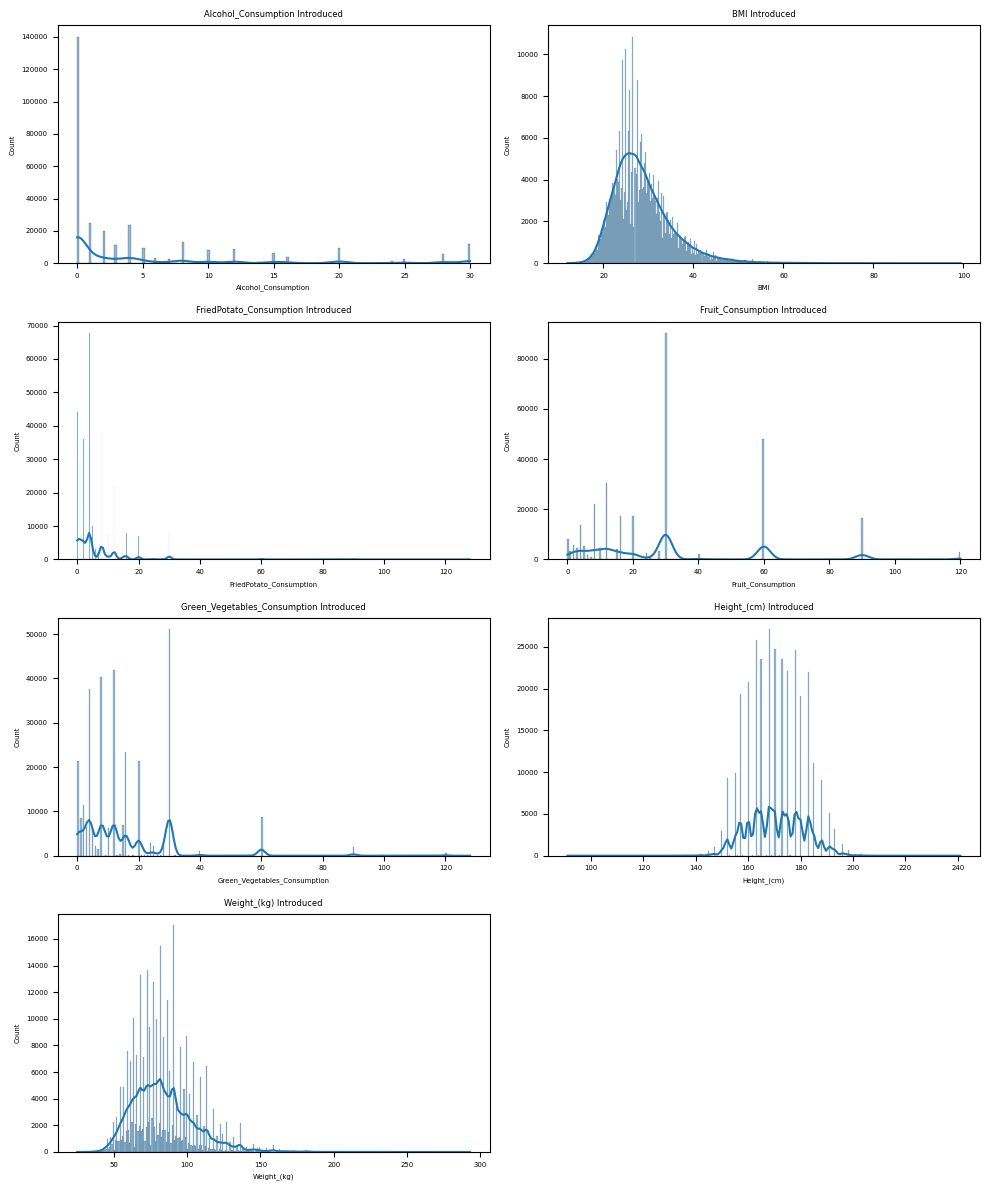

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change the number of rows and columns in the subplot grid to accommodate all numerical columns
fig, axs = plt.subplots(4, 2, figsize=(10, 12))  # Increased width and height
cols = numerical

# Check if the number of subplots matches the number of numerical columns
if len(cols) != axs.size:
    # If the number of columns is less than the number of numerical columns,
    # hide the empty subplots
    for i in range(len(cols), axs.size):
        axs.flatten()[i].axis('off')

for ax, column in zip(axs.flatten(), cols):
    # Create histogram plots with KDE using matplotlib and seaborn
    sns.histplot(new_df[column], kde=True, ax=ax)  # Use sns.histplot

    ax.set_title(f'{column} Introduced', fontsize=6)

    # Adjust x-tick label font size
    ax.tick_params(axis='x', which='major', labelsize=5)

    # Adjust y-tick label font size
    ax.tick_params(axis='y', which='major', labelsize=5)

    # Set x-axis label
    ax.set_xlabel(column, fontsize=5)

    # Set y-axis label
    ax.set_ylabel('Count', fontsize=5)

# Improve layout
plt.tight_layout()
plt.show()

### Multivariate Analysis
### Categorical Data
Here, we try to find how each categorical data is correlated to heart disease.

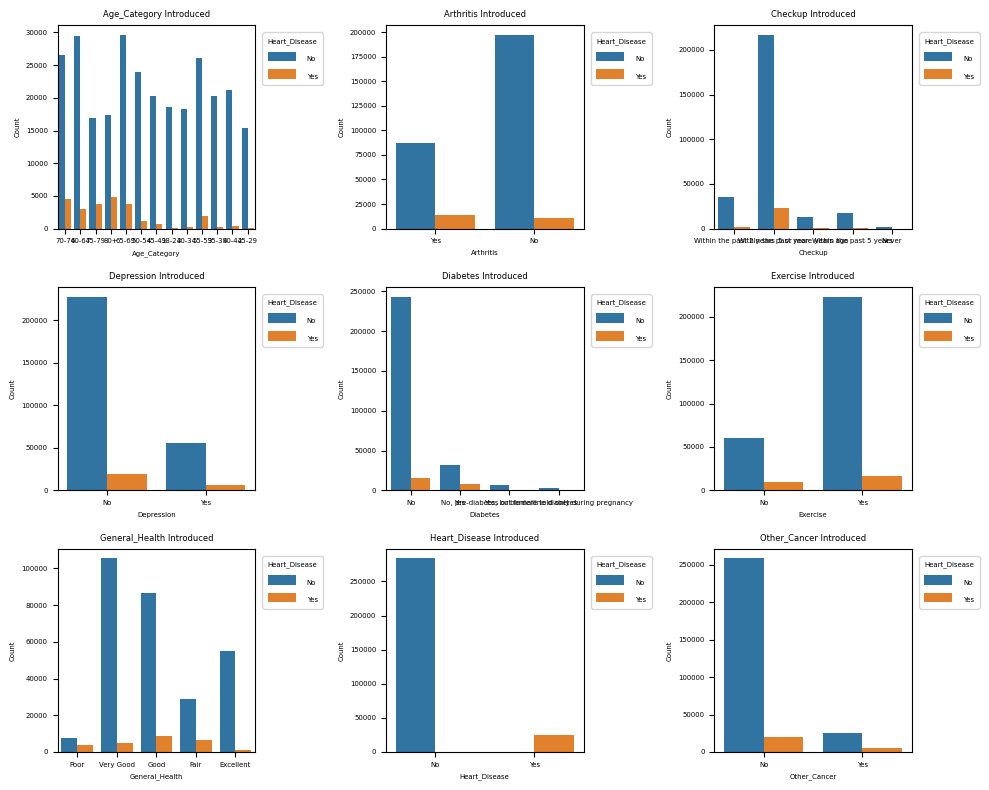

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
cat = categorical
target = 'Heart_Disease'

for ax, column in zip(axs.flatten(), cat):
    # Use Seaborn's countplot to create histograms (countplots)
    sns.countplot(data=new_df, x=column, hue=target, ax=ax)

    ax.set_title(f'{column} Introduced', fontsize=6)

    # Wrap x-tick labels
    labels = [label.get_text() for label in ax.get_xticklabels()]
    labels = [textwrap.fill(label) for label in labels]

    # Set x-tick labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=5)

    # Adjust y-tick label font size
    ax.tick_params(axis='y', which='major', labelsize=5)

    # Set x-axis label
    ax.set_xlabel(column, fontsize=5)

    # Set y-axis label
    ax.set_ylabel('Count', fontsize=5)

    # Access the legend and set its properties
    legend = ax.legend(title=target, bbox_to_anchor=(1, 1), loc='upper left')
    legend.get_title().set_fontsize(5)
    legend.get_title().set_color('black')
    for text in legend.get_texts():
        text.set_fontsize(5)

# Improve layout
plt.tight_layout()
plt.show()

Check for data types.

In [ ]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

### Numerical Data
Here, we visualize and see if there is any correlation between numerical data types. We encode the heart_disease class from 0 to 1.

In [ ]:
# Encoding the Heart_Disease column
df['Heart_Disease_Encoded'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})

In [ ]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease_Encoded
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,1
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,1
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,0


As noted in the heat map below. Heart_Disease_Encoded seems to be impacted byu the weight and and BMI the most compared to other classes.

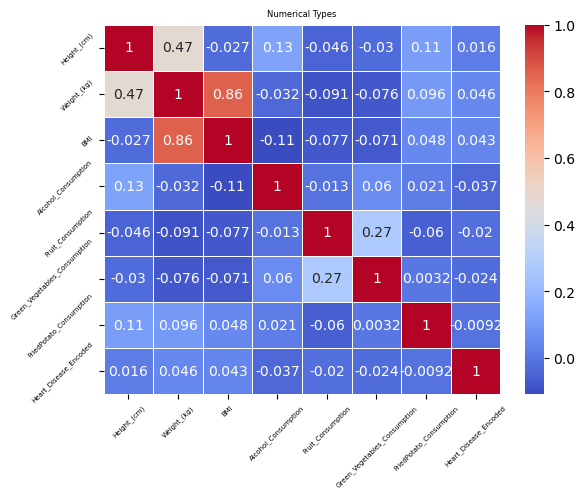

In [ ]:
# Assuming df is a DataFrame with multiple columns, silence warning with numeric only
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Numerical Types', fontsize=6)
plt.xlabel('',fontsize=5)  # Adjusting x label fontsize
plt.ylabel('',fontsize=5)  # Adjusting y label fontsize
plt.xticks(fontsize=5, rotation=45);  # Adjusting xticks fontsize
plt.yticks(fontsize=5, rotation=45); # Adjusting yticks fontsize

Then, just drop the previously created column to return back to original data.

In [ ]:
df.drop('Heart_Disease_Encoded', axis=1, inplace=True)
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


### Preprocessing
Here, we create a new Heart Disease column and map values No to 0 and Yes to 1 esentially changing it to a numerical column.

In [ ]:
# copy df and label encode Heart Disease
new = new_df.copy()
new['Heart_Disease'] = new['Heart_Disease'].map({'No':0,'Yes':1})
print(df['Heart_Disease'].value_counts())

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64


Instead of method above, we could also use sklearn LabelEncoder if we want.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Fit the LabelEncoder and transform y
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

In [ ]:
new

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,0,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,1,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,0,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,1,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,0,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,0,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,0,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,0,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


Show the ratio of Heart Disease

In [ ]:
# show ratio of heart disease
yes = new['Heart_Disease'].value_counts()[0]/len(new['Heart_Disease'])*100
no = new['Heart_Disease'].value_counts()[1]/len(new['Heart_Disease'])*100
print(yes, no)

91.9128553569925 8.087144643007507


### Set Target Variable and Split Data

The target variable, Heart Disease, is set and we split the data into X_train, X_test, y_train, y_test with a test size of 20%, the remaining 80% will be used for training.

In [ ]:
# set target variable for both testing and training data
X = new.drop("Heart_Disease", axis=1)
y = new["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((247019, 18), (247019,), (61755, 18), (61755,))

Notes:

* There are 8 categorical variables. Variables that are not in order
* There are 7 numerical variables.
* There are 3 ordinal variables. The General Health, Age Category, and the Checkup variable. The data from this can be represented with an order.

### Create Pipelines

We create...

* Numerical
* Catergorical
* Age
* General Health
* Checkup

Pipelines and put them into one ColumnTransformer.

In [ ]:
# Catergorical Pipeline
cat_pipeline = Pipeline(steps=[
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

In [ ]:
# Num Pipeline
num_pipeline = Pipeline(steps=[
    ('std_scaler', StandardScaler()),
])

In [ ]:
# Age Category Pipeline
agecat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [ ]:
# General Health Pipeline
genhealth_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']]))
])

In [ ]:
# Checkup Pipeline
checkup_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']]))
])

In [ ]:
## Setting each column to the pipeline where they will be used
num_pipe_col = new.select_dtypes(include=['float64']).columns.tolist()

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other_Cancer', 'Sex',
       'Skin_Cancer', 'Smoking_History']

In [ ]:
# Combine all these into one transformer
preprocess_transformer = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_pipe_col),
        ('cat', cat_pipeline, cat_pipe_col),
        ('age', agecat_pipeline, ['Age_Category']),
        ('gen', genhealth_pipeline, ['General_Health']),
        ('check', checkup_pipeline, ['Checkup'])
    ] ,remainder='passthrough'
)

### Create Fit and Train Function

In [ ]:
def fit_and_print(p, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    p.fit(X_train, y_train)
    train_preds = p.predict(X_train)
    test_preds = p.predict(X_test)
    print('Training Prediction: ' + str(mean_absolute_error(train_preds, y_train)))
    print('Testing Prediction: ' + str(mean_absolute_error(test_preds, y_test)))

Display one pipeline with Linear Regression Model.

In [ ]:
p1 = Pipeline([('Preprocess Transformer', preprocess_transformer),
('Linear Regression', LinearRegression())])
p1

Pipeline(steps=[('Preprocess Transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Height_(cm)', 'Weight_(kg)',
                                                   'BMI', 'Alcohol_Consumption',
                                                   'Fruit_Consumption',
                                                   'Green_Vegetables_Consumption',
                                                   'FriedPotato_Consumption']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unkno...
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent']]))]),
                                                  ['General_Health']),
                                                 ('check',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Within '
                                                                                               'the '
                                                                                               'past '
                                                                                               'year',
                                                                                               'Within '
                                                                                               'the '
                                                                                               'past '
                                                                                               '2 '
                                                                                               'years',
                                                                                               'Within '
                                                                                               'the '
                                                                                               'past '
                                                                                               '5 '
                                                                                               'years',
                                                                                               '5 '
                                                                                               'or '
                                                                                               'more '
                                                                                               'years '
                                                                                               'ago',
                                                                                               'Never']]))]),
                                                  ['Checkup'])])),

### Define all Pipelines and Models
We try multiple models and get their cross validation score.
Then, we show their classification report.

In [ ]:
# Define the pipelines in a dictionary
pipelines = {
    'Random Forest': Pipeline([('Preprocess Transformer', preprocess_transformer),
                               ('Random Forest', RFR(n_estimators=10, max_depth=7))]),
    'Logistic_Regression': Pipeline([('Preprocess Transformer', preprocess_transformer),
                               ('Logistic_Regression', LogisticRegression(max_iter=10000,random_state=22))]),
    'K-Nearest_Neighbor': Pipeline([('Preprocess Transformer', preprocess_transformer),
                               ('K-Nearest_Neighbor', KNeighborsClassifier())]),
    'GaussianNB': Pipeline([('Preprocess Transformer', preprocess_transformer),
                               ('GaussianNB', GaussianNB())]),
    'Decision Tree': Pipeline([('Preprocess Transformer', preprocess_transformer),
                           ('Decision Tree Classifier', DecisionTreeClassifier(random_state=22))])
}

## Get Predictions from Models

A lower MAE indicates better model performance. An MAE of 0 would mean perfect predictions, but this is rarely, if ever, achieved in practice. However, also consider the difference between training and testing MAE to gauge overfitting.

* The Decision Tree model has an exceptionally low training MAE, almost zero, which suggests that it might be overfitting to the training data. This is further supported by the fact that its test MAE is significantly higher than its training MAE.

* Random Forest, Logistic Regression, and K-Nearest Neighbor models: have relatively close training and testing MAEs, suggesting that they might generalize well to unseen data.

* The GaussianNB model has the highest MAE values for both training and testing datasets, which might indicate that it's not performing as well as the other models for this particular dataset.

Considering both the lowest test MAE and the consistency between training and testing MAEs, the Logistic Regression model appears to be the best overall model from the provided data.

Let's say we're still hesistant on which model is better solely based on MAE. After looking at the classification reports, we can certainly say the Logistic Regression outperforms Random Forests.

In [ ]:
# Create a report dictionary to store the MAE results
report = {}

# Initialize an empty dictionary to store classification reports
classification_reports = {}

In [ ]:
from sklearn.metrics import classification_report

# Loop over the dictionary
for model_name, pipeline in pipelines.items():
    # Fit and print the model
    pipeline.fit(X_train, y_train)

    # Get the prediction report
    train_preds = pipeline.predict(X_train)
    test_preds = pipeline.predict(X_test)

    # Calculate MAE for training and testing predictions
    train_error = mean_absolute_error(y_train, train_preds)
    test_error = mean_absolute_error(y_test, test_preds)

    # Store the results in report dictionary
    report[model_name] = {'Train MAE': train_error, 'Test MAE': test_error}

    # Generate and store the classification report for test data
    class_report = classification_report(y_test, test_preds)
    classification_reports[model_name] = class_report

# Convert the report to a dataframe
report_df = pd.DataFrame(report).T

print(report_df)

# Print the classification reports
for model, class_report in classification_reports.items():
    print(f"Classification Report for {model}:\n")
    print(class_report)
    print("-" * 50)


                     Train MAE  Test MAE
Random Forest         8.05e-02      0.08
Logistic_Regression   8.05e-02      0.08
K-Nearest_Neighbor    7.25e-02      0.09
GaussianNB            2.22e-01      0.22
Decision Tree         1.21e-05      0.14
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.56      0.00      0.00      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.50      0.48     61755
weighted avg       0.89      0.92      0.88     61755

--------------------------------------------------
Classification Report for Logistic_Regression:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.56      0.06      0.11      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.53      0.54     61755
weighted avg  